In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Sales_Transactions_dataset_weekly.csv")

In [3]:
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


In [5]:
data.isna().sum()

Product_Code     0
W0               0
W1               0
W2               0
W3               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 107, dtype: int64

### 3 Clustering Analysis

In [6]:
X = data.iloc[:, 1:53]
X.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [7]:
X.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.394575,8.318126,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.348777,11.250455,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,52.000000,50.000000,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000


In [9]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pylab 
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PowerTransformer

### Feature Scaling and Transformation

In [11]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))
scaled_X.columns = X.columns

### Data Visualization

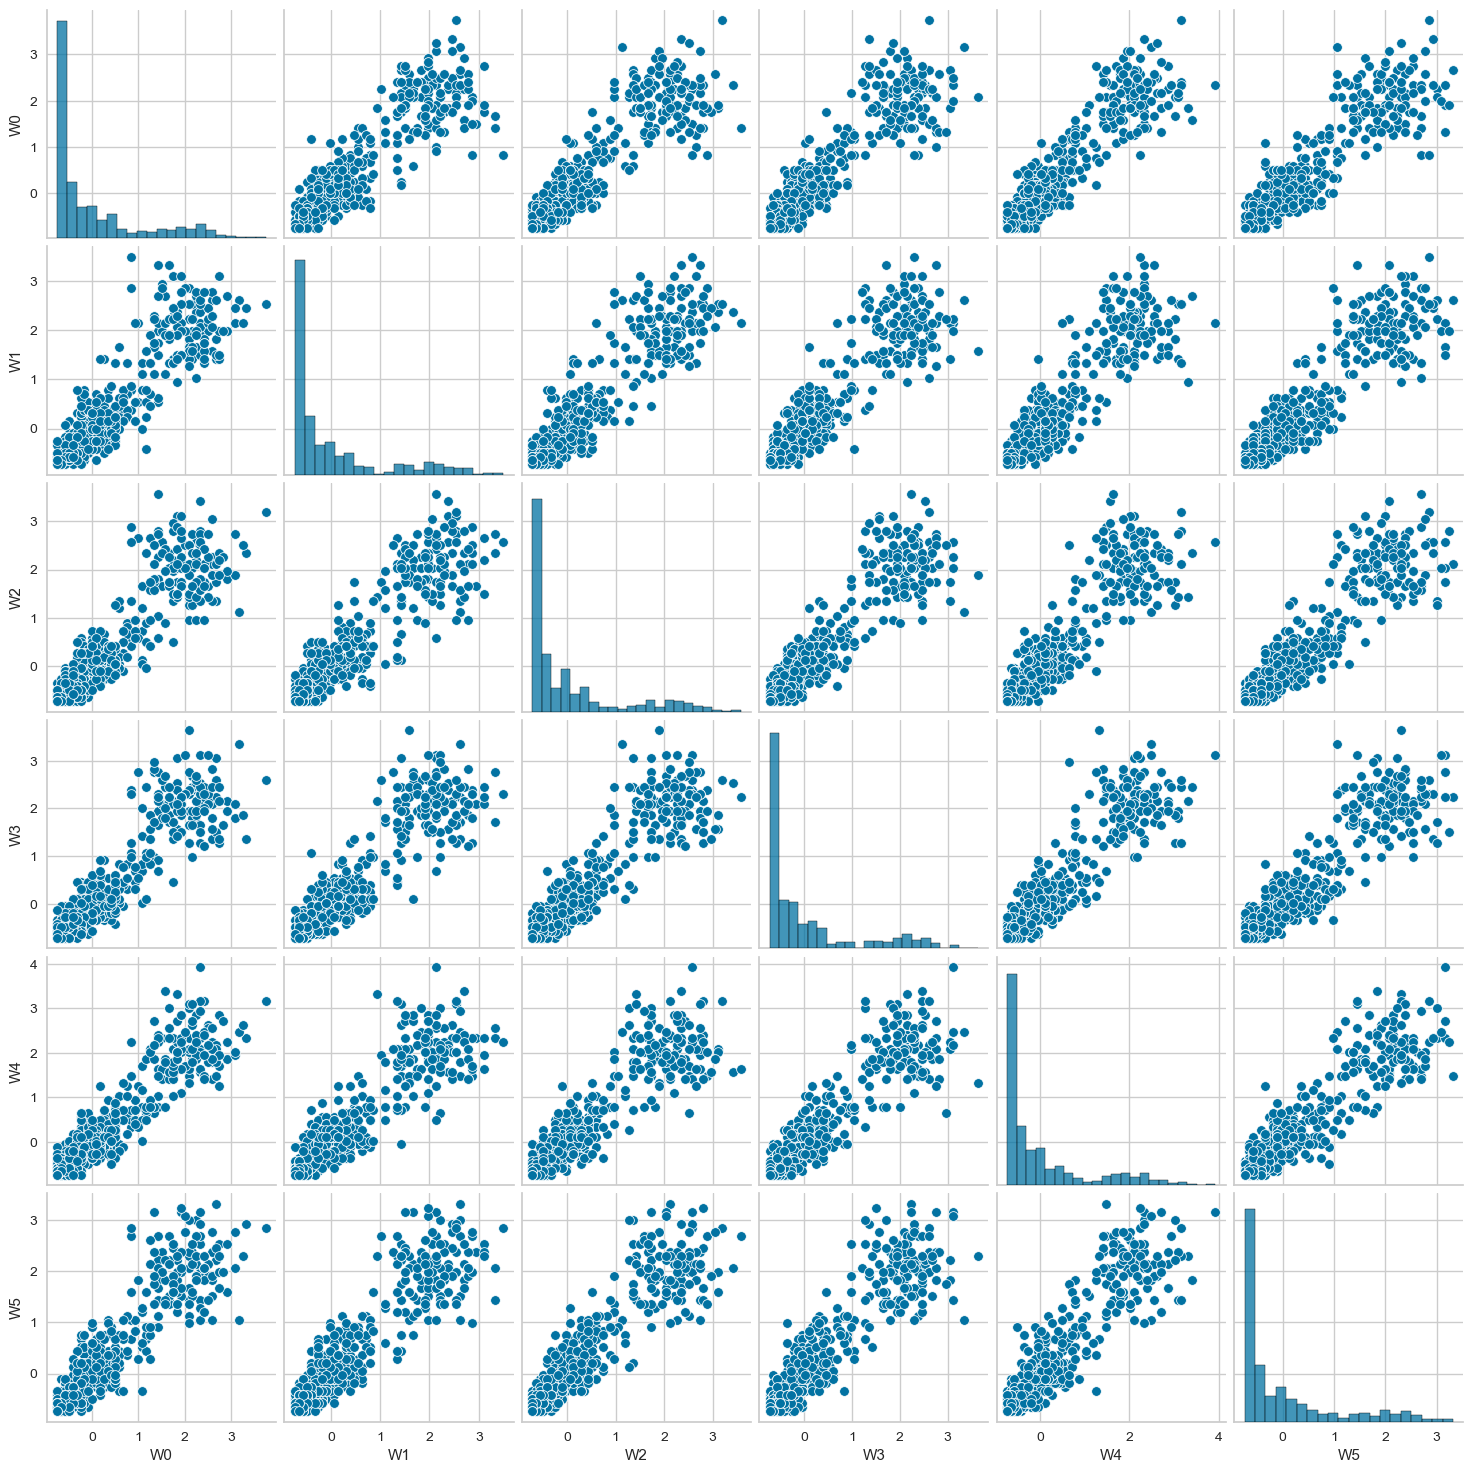

In [12]:
sns.pairplot(scaled_X.iloc[:,0:6])

## Q-Q plots

### Q-Q Plots Scaled Data

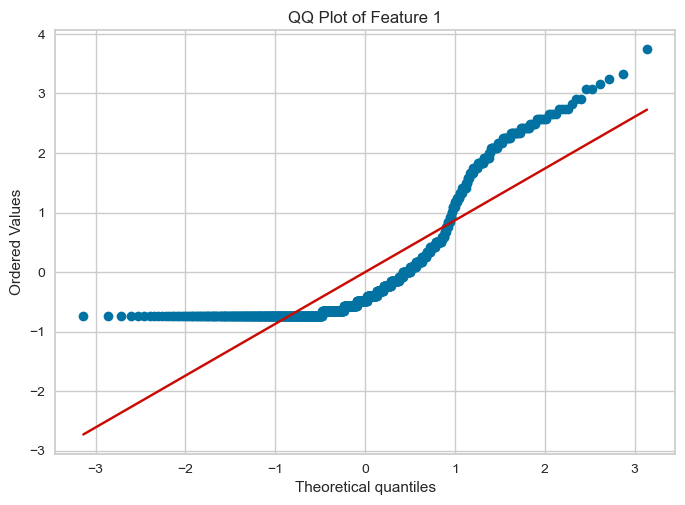

In [13]:
stats.probplot(scaled_X.iloc[:,0], dist="norm", plot=pylab)
plt.title('QQ Plot of Feature 1')
pylab.show()

### Transformed Log

In [16]:
X_LogTransformed = np.log10(scaled_X + 1)

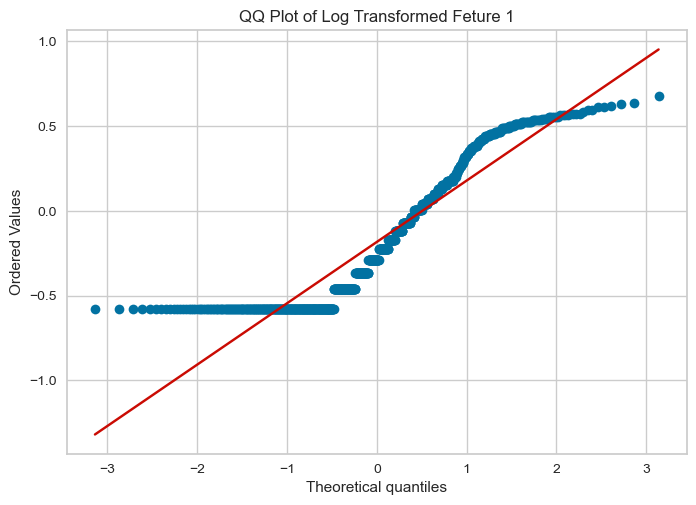

In [18]:
stats.probplot(X_LogTransformed.iloc[:,0], dist="norm", plot=pylab)
plt.title('QQ Plot of Log Transformed Feture 1')
pylab.show()

### Power Transformed Data

In [19]:
pt = PowerTransformer()
X_PowerTransformed = pt.fit_transform(scaled_X)

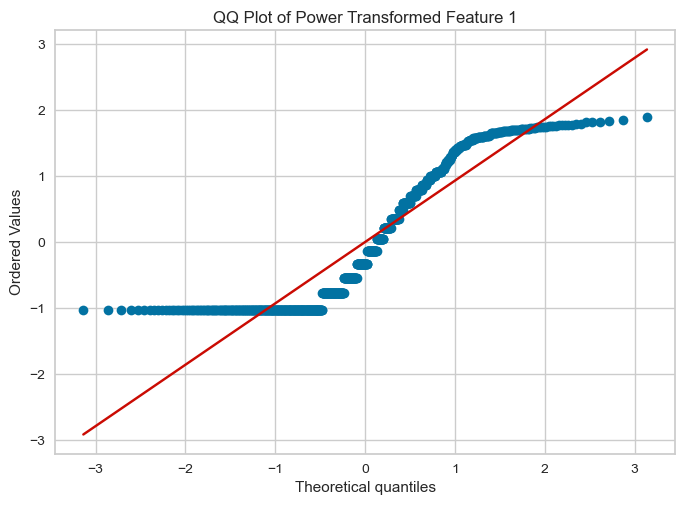

In [20]:
stats.probplot(X_PowerTransformed[:,0], dist="norm", plot=pylab)
plt.title('QQ Plot of Power Transformed Feature 1')
pylab.show()

### Scaled Data KDE Plot

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.distplot(scaled_X)
plt.title('Original Distribution')

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Original Distribution')

### Log Transformed Data

In [22]:
plt.subplot(132)
sns.distplot(X_LogTransformed)
plt.title('Log Transformed Distribution')

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Transformed Distribution')

In [23]:
plt.subplot(133)
sns.distplot(X_PowerTransformed)
_ = plt.title('Power Transformed Distribution')

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


# K-means Clustering

### Elbow Method

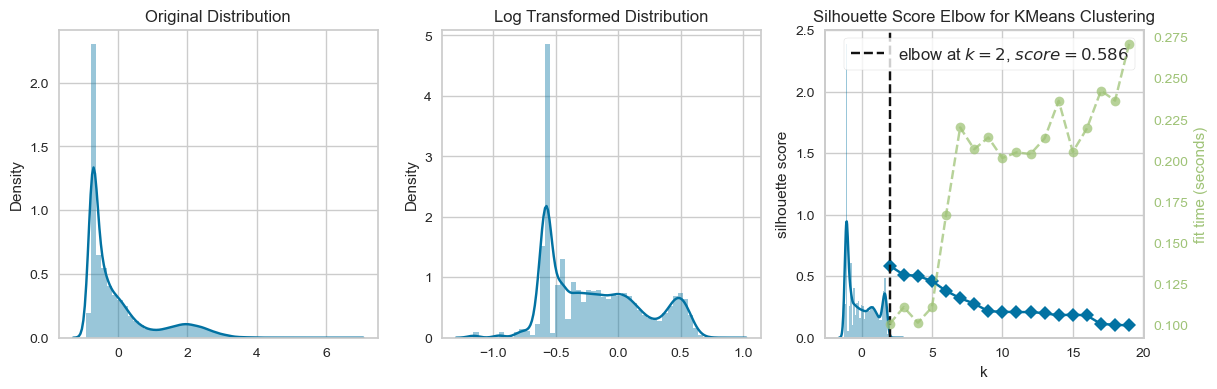

In [25]:
X = X_LogTransformed.to_numpy()
km = KMeans()
visualizer = KElbowVisualizer(km, k = (2,20), locate_elbow=True, metric = 'silhouette')
visualizer.fit(X)
_ = visualizer.poof()

### Function for Plotting Cluster

In [26]:
def plot_clusters(no_cluster, cluster_pred_values):
    for x in range(no_cluster):
        clustername = "cluster " + str(x)
        plt.scatter(
            X[cluster_pred_values == x, 0], X[cluster_pred_values == x, 1],
            s=50, c=np.random.rand(3,),
            edgecolor='black',
            label= clustername)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

### Centroid

In [27]:
def plot_centroids(km_model):
    plt.scatter(
    km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1],
    s=150, marker='o',
    c='red', edgecolor='black',
    label='centroids')

### K-means 2 Cluster

In [28]:
km = KMeans(n_clusters=2, init='random',
           n_init=10, max_iter=300,
            tol=1e-04, random_state=0)

km_predict = km.fit_predict(X[:,0:2])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


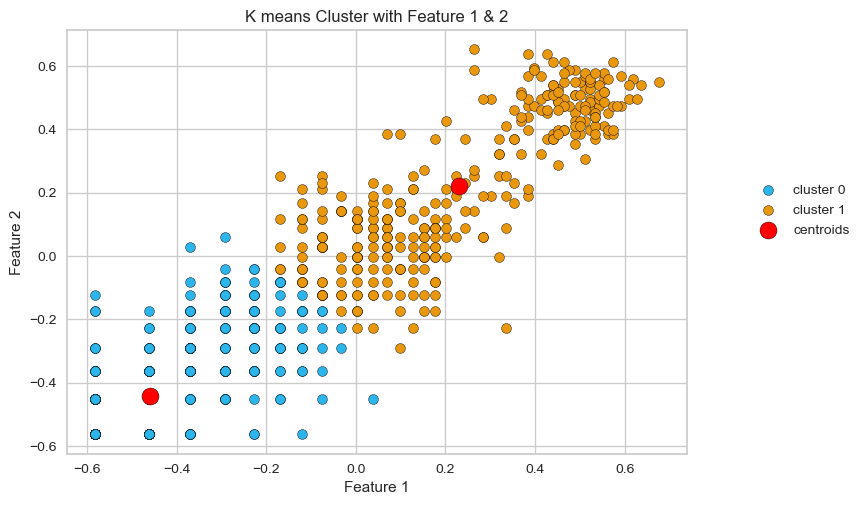

In [29]:
plot_clusters(2, km_predict)
plot_centroids(km)
plt.legend(scatterpoints=1,loc = (1.1,0.5))
plt.title('K means Cluster with Feature 1 & 2')
plt.show()

### Silhoutte Score for K-means

In [31]:
print('Silhouette Score for K-Means Clustering: {}'.format(silhouette_score(X, km.labels_, metric = 'euclidean')))

Silhouette Score for K-Means Clustering: 0.5658688372661332


## Principal Component Analysis(PCA)

In [32]:
data.head(10)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
5,P6,3,3,2,7,6,3,8,6,6,...,0.36,0.18,0.36,0.27,0.55,0.45,0.27,0.27,0.91,0.55
6,P7,4,8,3,7,8,7,2,3,10,...,0.20,0.30,0.30,0.60,0.20,0.60,0.20,0.40,0.20,0.10
7,P8,8,6,10,9,6,8,7,5,10,...,0.58,0.92,0.08,0.42,0.42,0.25,0.33,0.08,0.50,0.50
8,P9,14,9,10,7,11,15,12,7,13,...,0.53,0.13,0.67,0.00,0.27,0.27,0.47,0.60,0.27,0.67
9,P10,22,19,19,29,20,16,26,20,24,...,0.21,0.33,0.08,0.63,0.17,0.29,0.38,0.58,0.38,0.46


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


In [34]:
y_values = data['Product_Code'].values

In [35]:
X_values = data.iloc[:,2:].values

In [36]:
X_values.shape

(811, 105)

### Standardizing the features

In [37]:
means = X_values.mean(axis = 0)

In [38]:
std_devs = X_values.std(axis = 0)

In [39]:
X_std = (X_values - means)/std_devs

In [40]:
X_std.shape

(811, 105)

In [41]:
np.round(X_std.mean(axis = 0))

array([ 0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,
        0.])

In [42]:
np.round(X_std.std(axis=0))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

## Covariance

In [43]:
C = np.corrcoef(X_std.T)

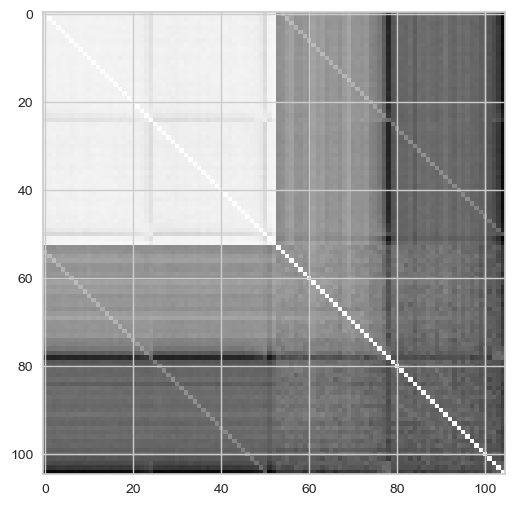

In [45]:
plt.figure(figsize=(8,6))
plt.imshow(C, cmap='gray', interpolation = 'nearest')
plt.show()

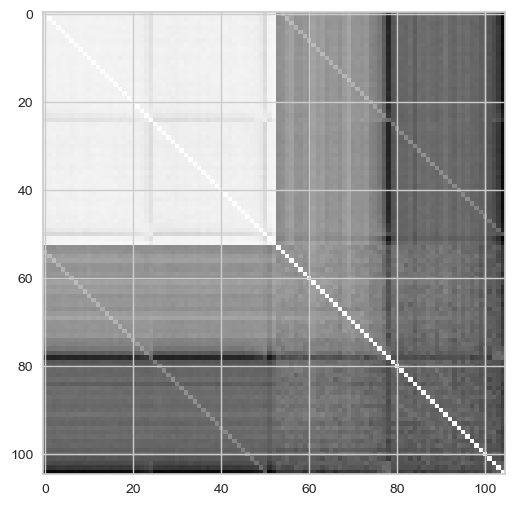

In [46]:
plt.figure(figsize=(8,6))
plt.imshow(np.corrcoef(X_values.T), cmap='gray', interpolation='nearest')
plt.show()

In [47]:
np.allclose(np.corrcoef(X_std.T), np.corrcoef(X_values.T))

True

### Eigen Values and Eigen Vectors

In [48]:
w, v = np.linalg.eig(C)

In [49]:
v.shape

(105, 105)

### Plotting

In [50]:
sum_of_eig_values = np.sum(w)

In [51]:
w_norm = w / sum_of_eig_values

In [52]:
explained_variance = np.cumsum(w_norm)

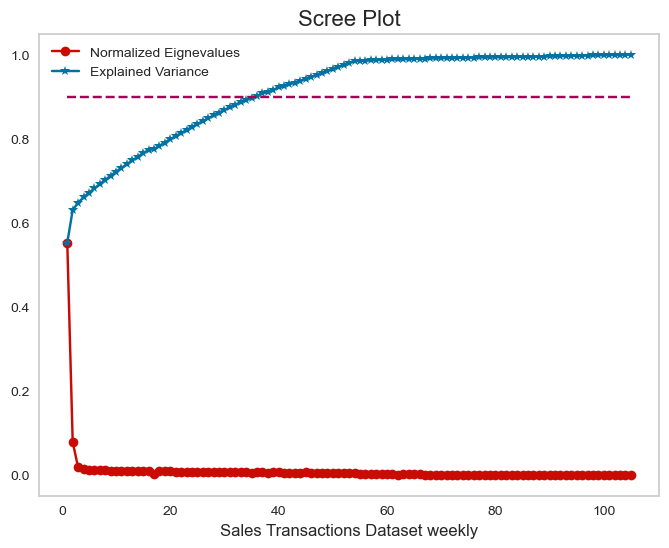

In [54]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(w_norm)+1), w_norm, 'ro-', label='Normalized Eignevalues')
plt.plot(np.arange(1, len(w_norm)+1), explained_variance, 'b*-', label='Explained Variance')
plt.grid()
plt.title("Scree Plot", fontsize=16)
plt.xlabel("Sales Transactions Dataset weekly", fontsize=12)
plt.plot(np.arange(1, len(w_norm)+1), [0.9]*len(w_norm), linestyle='dashed', color='m')
plt.legend()
plt.show()

In [55]:
k = 7

U = v[:,:k]

In [56]:
U.shape

(105, 7)

### Data Transform

In [57]:
X_transform = np.dot(X_std, U)

In [58]:
X_transform.shape

(811, 7)

### Data Visualization

In [59]:
X_tr_viz = np.dot(X_std, v[:,:2])

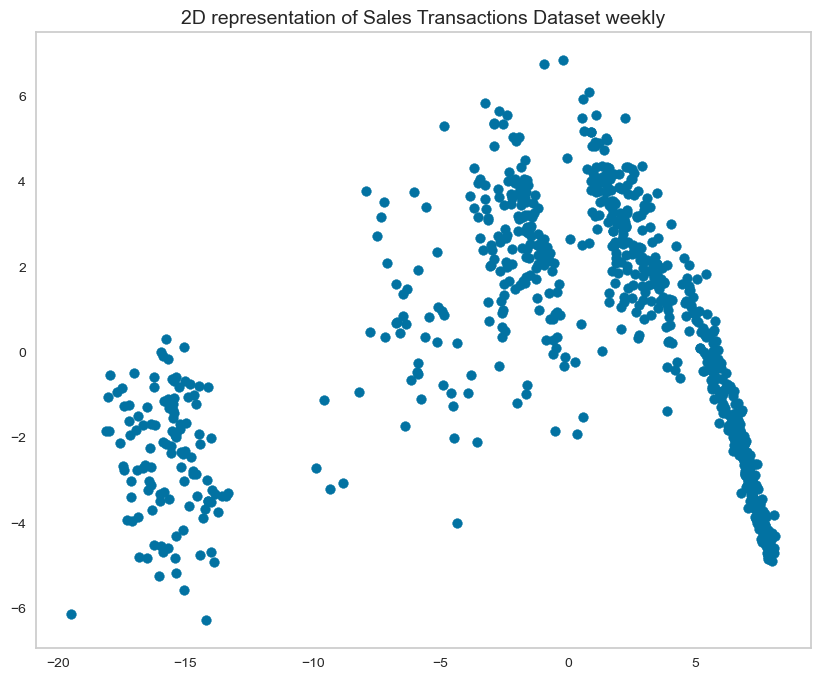

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(X_tr_viz[:,0], X_tr_viz[:,1])
plt.grid()
plt.title("2D representation of Sales Transactions Dataset weekly", fontsize=14)
plt.show()

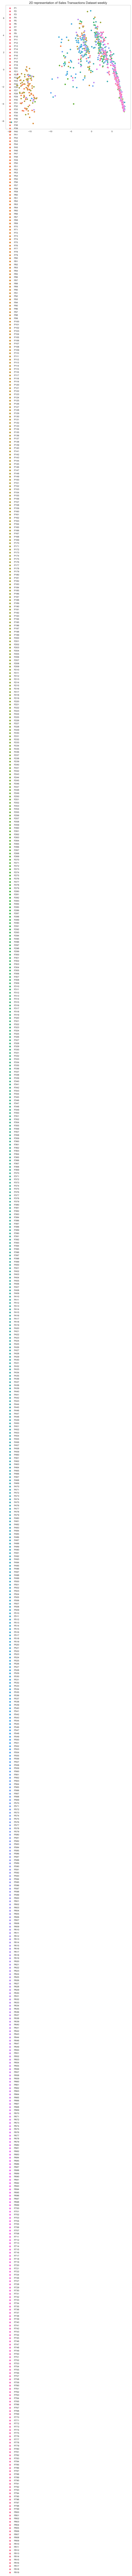

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tr_viz[:,0], y=X_tr_viz[:,1], hue=y_values)
plt.grid()
plt.title("2D representation of Sales Transactions Dataset weekly", fontsize=14)
plt.show()